# Covariance Visualisation

In [1]:
import numpy as np
import theano
import pymc3 as pm
import theano.tensor as tt
import matplotlib.cm as cmap
np.random.seed(206)

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


In [12]:
# function to display covariance matrices
def plot_cov(X, K, stationary=True):
    K = K + 1e-8*np.eye(X.shape[0])
    x = X.flatten()
    fig = plt.figure(figsize=(14,5))
    ax1 = fig.add_subplot(121)
    m = ax1.imshow(K, cmap="inferno",
                   interpolation='none',
                   extent=(np.min(X), np.max(X), np.max(X), np.min(X)));
    plt.colorbar(m);
    ax1.set_title("Covariance Matrix")
    ax1.set_xlabel("X")
    ax1.set_ylabel("X")

    ax2 = fig.add_subplot(122)
    if not stationary:
        ax2.plot(x, np.diag(K), "k", lw=2, alpha=0.8)
        ax2.set_title("The Diagonal of K")
        ax2.set_ylabel("k(x,x)")
    else:
        ax2.plot(x, K[:,0], "k", lw=2, alpha=0.8)
        ax2.set_title("$k$ as a function of x - x'")
        ax2.set_ylabel("$k(x,x')$")
    ax2.set_xlabel("X")

    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot(111)
    samples = np.random.multivariate_normal(np.zeros(length), K, 7).T;
    for i in range(samples.shape[1]):
        ax.plot(x, samples[:,i], lw=2);
    ax.set_title("Samples from GP Prior")
    ax.set_xlabel("X")
    

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# function to display covariance matrices
def plot_cov(X, K, stationary=True, filename=None):
    K = K + 1e-8*np.eye(X.shape[0])
    x = X.flatten()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

    # plot covariance matrix
    im = axs[0].imshow(K, cmap="inferno", interpolation='none', aspect="equal", vmin=0, vmax=1)
    fig.colorbar(im, ax=axs[0])
    axs[0].set_title("Covariance Matrix")
    axs[0].set_xlabel("X")
    axs[0].set_ylabel("X")

    # plot diagonal of K
    if not stationary:
        axs[1].plot(x, np.diag(K), "k", lw=2, alpha=0.8)
        axs[1].set_title("The Diagonal of K")
        axs[1].set_ylabel("k(x,x)")
    else:
        axs[1].plot(x, K[:,0], "k", lw=2, alpha=0.8)
        axs[1].set_title("K as a function of x - x'")
        axs[1].set_ylabel("k(x,x')")
    axs[1].set_xlabel("X")

    plt.tight_layout()

    if filename:
        fig.savefig(filename[:-4]+'_1.png', dpi=300)
    
    # plot samples from GP prior
    fig, ax = plt.subplots(figsize=(13,4))
    samples = np.random.multivariate_normal(np.zeros(length), K, 7).T;
    for i in range(samples.shape[1]):
        ax.plot(x, samples[:,i], lw=2);
    ax.set_title("Samples from GP Prior")
    ax.set_xlabel("X")
    
    plt.tight_layout()

    if filename:
        fig.savefig(filename[:-4]+'_2.png', dpi=300)
    else:
        plt.show()

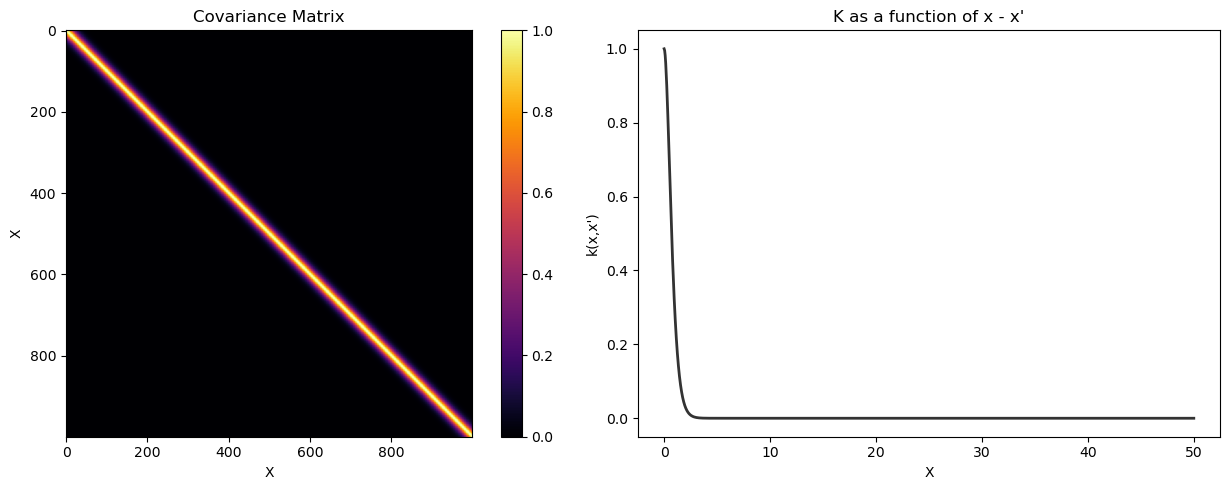

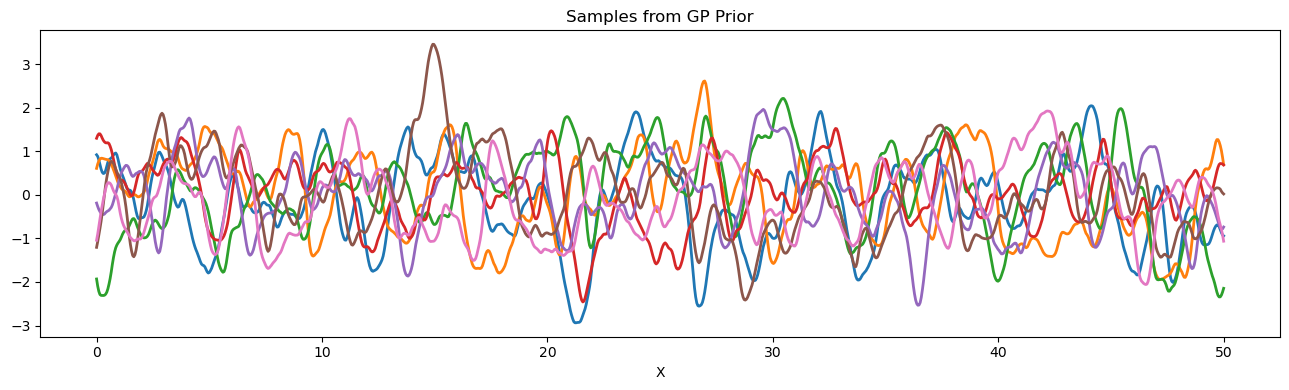

In [15]:
with pm.Model() as model:
    
    # Define the phase of the sinusoidal mean
    phase = 1.8
    
    # Define the amplitude of the sinusoidal mean
    amplitude = 79
     
    # Define the offset of the sinusoidal mean
    offset = 33
    
    # Define the amplitude of the kernel
    A = 0.68
    
    # Define the `Period' 
    period = 11
    
    # Define the `length scale 1' of the periodic kernel
    length_scale1 = .68  
    
    # Define the `length_scale 2' of the squared-exponential kernel 
    length_scale2 = 13
    
    # Define the `Standard deviation' 
    sigma = 0.05
    
    # Define the periodic kernel
    cov_periodic = pm.gp.cov.Periodic(1, period=period, ls=length_scale1)
    
    # Define the squared-exponential kernel
    cov_Matern52 = pm.gp.cov.Matern52(1, ls=length_scale2)
    
    # Define the kernel
    cov = A**2 * cov_Matern52 * cov_periodic
    
K = theano.function([], cov_qp(X_new))()
plot_cov(X_new, K)